In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns,risk_models

In [2]:
df=pd.read_excel("C:\\Users\\lalit.singh\\Downloads\\enhanced_investment_portfolio_data.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Gender                         10000 non-null  object 
 3   Marital_Status                 10000 non-null  object 
 4   Household_Size                 10000 non-null  int64  
 5   Education_Level                10000 non-null  object 
 6   Occupation                     10000 non-null  object 
 7   Income_Level                   10000 non-null  object 
 8   Total_Assets                   10000 non-null  int64  
 9   Liabilities                    10000 non-null  int64  
 10  Net_Worth                      10000 non-null  int64  
 11  Debt-to-Income                 10000 non-null  float64
 12  Preferred_Assets               10000 non-null  

In [4]:
print('Shape of Data',df.shape)

print()
print(df.dtypes)

Shape of Data (10000, 33)

CustomerID                         int64
Age                                int64
Gender                            object
Marital_Status                    object
Household_Size                     int64
Education_Level                   object
Occupation                        object
Income_Level                      object
Total_Assets                       int64
Liabilities                        int64
Net_Worth                          int64
Debt-to-Income                   float64
Preferred_Assets                  object
Sector_Preferences                object
Return_Expectation                 int64
Risk_Appetite                     object
Investment_Horizon                object
GDP_Growth_Rate                  float64
Inflation_Rate                   float64
Interest_Rates                   float64
Stock_Indexes                     object
Compliance_With_Regulations       object
Tax_Implications                  object
KYC_Requirements              

In [5]:
print('Missing Values If any',df.isna().sum())

Missing Values If any CustomerID                       0
Age                              0
Gender                           0
Marital_Status                   0
Household_Size                   0
Education_Level                  0
Occupation                       0
Income_Level                     0
Total_Assets                     0
Liabilities                      0
Net_Worth                        0
Debt-to-Income                   0
Preferred_Assets                 0
Sector_Preferences               0
Return_Expectation               0
Risk_Appetite                    0
Investment_Horizon               0
GDP_Growth_Rate                  0
Inflation_Rate                   0
Interest_Rates                   0
Stock_Indexes                    0
Compliance_With_Regulations      0
Tax_Implications                 0
KYC_Requirements                 0
ESG_Criteria                     0
Social_Responsibility            0
Corporate_Governance             0
Asset_Allocation                 

In [6]:
print(df.describe())

        CustomerID  ...  Investment_Fees
count  10000.00000  ...     10000.000000
mean    5000.50000  ...         2.010040
std     2886.89568  ...         0.579191
min        1.00000  ...         1.000000
25%     2500.75000  ...         1.500000
50%     5000.50000  ...         2.000000
75%     7500.25000  ...         2.500000
max    10000.00000  ...         3.000000

[8 rows x 16 columns]


In [7]:
print(df.describe(include=['object','bool']) )# Summary for categorical columns

        Gender Marital_Status  ... Corporate_Governance Liquidity
count    10000          10000  ...                10000     10000
unique       2              2  ...                    3         3
top     Female        Married  ...            Excellent      High
freq      5005           5015  ...                 3366      3388

[4 rows x 17 columns]


In [8]:
df.drop_duplicates(inplace=True)  # Handling Duplicates 

In [9]:
df = df[df['Age'] <= 100] 
df.shape

(10000, 33)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


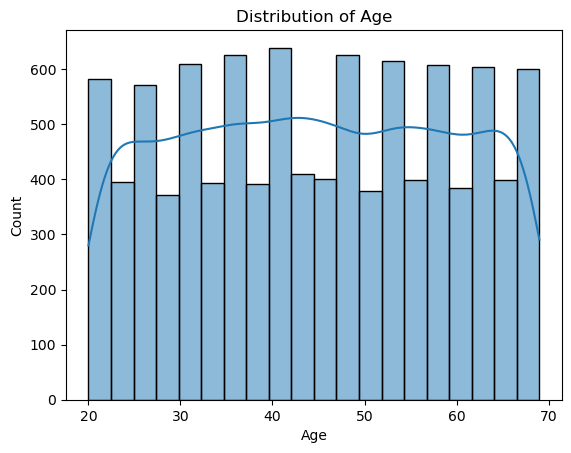

In [10]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [11]:
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns   # Drop columns that are non-numeric
df_numeric = df.drop(columns=non_numeric_columns)

correlation_matrix=df_numeric.corr()
print(correlation_matrix)

                               CustomerID  ...  Investment_Fees
CustomerID                       1.000000  ...        -0.009600
Age                             -0.001209  ...        -0.016787
Household_Size                   0.012279  ...        -0.001133
Total_Assets                     0.009786  ...        -0.000713
Liabilities                     -0.012951  ...        -0.010921
Net_Worth                        0.000254  ...         0.002800
Debt-to-Income                  -0.007446  ...        -0.007403
Return_Expectation              -0.009176  ...         0.004754
GDP_Growth_Rate                 -0.016200  ...         0.005530
Inflation_Rate                  -0.012537  ...        -0.000481
Interest_Rates                   0.000048  ...        -0.004198
Asset_Allocation                 0.012879  ...         0.034838
Historical_Returns              -0.016796  ...        -0.009871
Volatility                      -0.001758  ...        -0.013883
Correlation_with_Other Assets    0.00917

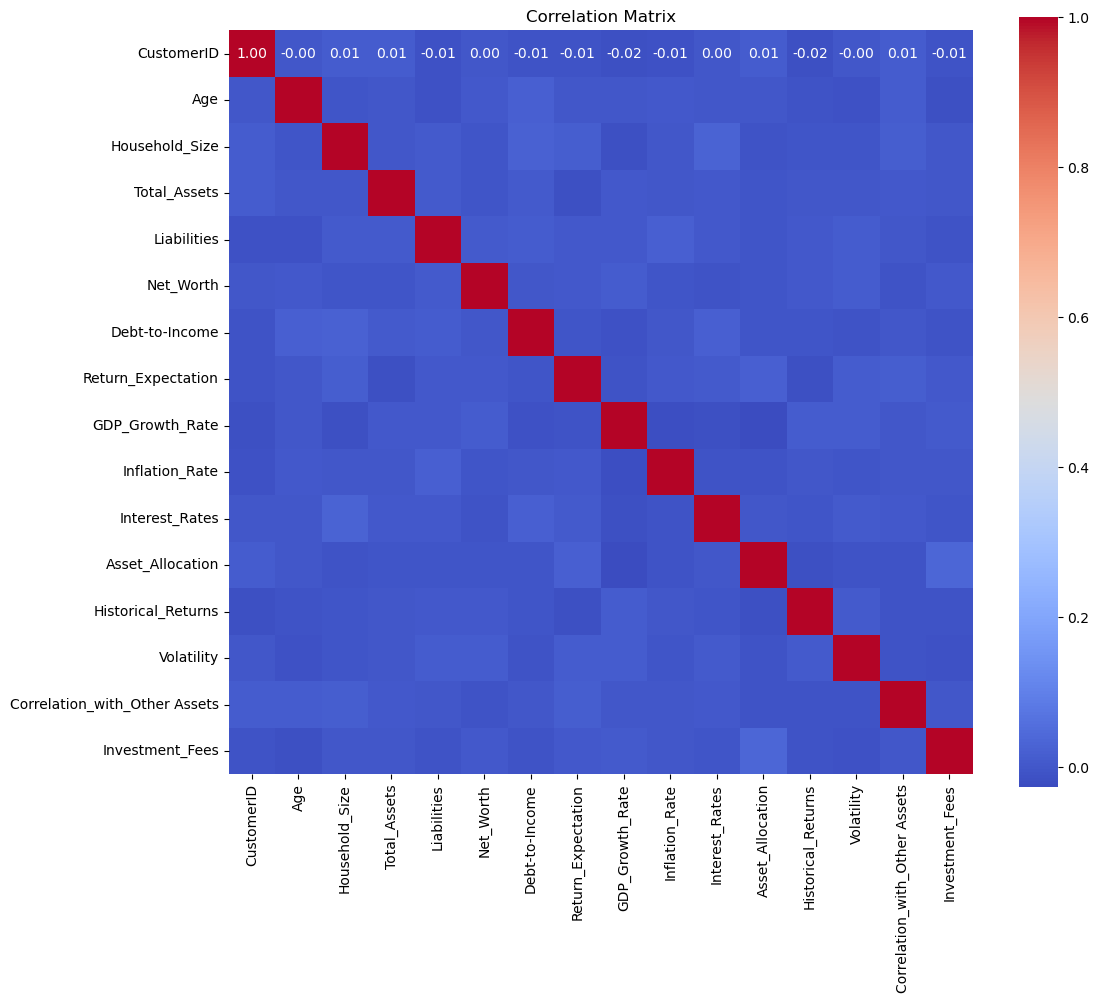

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.title('Correlation Matrix')
plt.show()

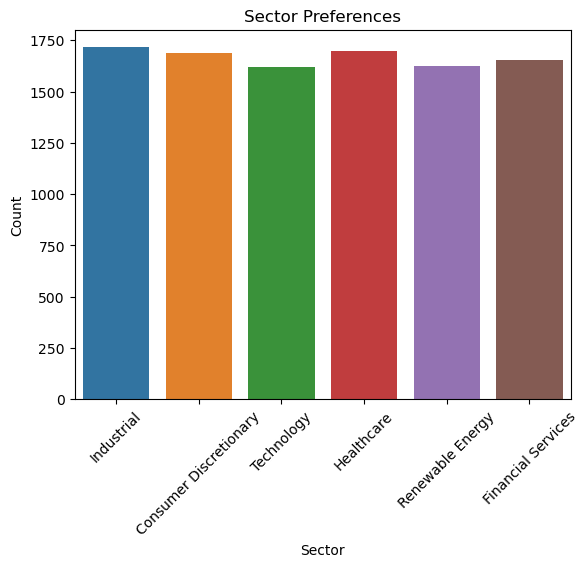

In [13]:
sns.countplot(data=df, x='Sector_Preferences')
plt.title('Sector Preferences')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor